# Prediction Using Different Machine Learning Methods

## 1 Linear Regression


In this notebook, we'll train a Linear Regression model for predicting building energy consumption based on historical enregy data, several weather variables, hour of the day, day of the week, weekends and holidays. 

To do this, we'll fit the model to daily and hourly energy and weather data from 2012-01-01 to 2014-10-31. 

In [251]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'

In [252]:
from sklearn.linear_model import LinearRegression
dailyElectricity = pd.read_excel('Data/dailyElectricityWithFeatures.xlsx')
dailyElectricity = dailyElectricity.drop('startDay', 1).drop('endDay', 1)

dailyChilledWater = pd.read_excel('Data/dailyChilledWaterWithFeatures.xlsx')
dailyChilledWater = dailyChilledWater.drop('startDay', 1).drop('endDay', 1)

dailySteam = pd.read_excel('Data/dailySteamWithFeatures.xlsx')
dailySteam = dailySteam.drop('startDay', 1).drop('endDay', 1)

hourlyElectricity = pd.read_excel('Data/hourlyElectricityWithFeatures.xlsx')
hourlyElectricity = hourlyElectricity.drop('startTime', 1).drop('endTime', 1)

hourlyChilledWater = pd.read_excel('Data/hourlyChilledWaterWithFeatures.xlsx')
hourlyChilledWater = hourlyChilledWater.drop('startTime', 1).drop('endTime', 1)

hourlySteam = pd.read_excel('Data/hourlySteamWithFeatures.xlsx')
hourlySteam = hourlySteam.drop('startTime', 1).drop('endTime', 1)

#display a dataframe
dailyElectricity.head()

electricity-kWh       RH-%       T-C     Tdew-C  pressure-mbar  \
2012-01-01      2800.244977  76.652174  7.173913   3.073913    1004.956522   
2012-01-02      3168.974047  55.958333  5.833333  -2.937500     994.625000   
2012-01-03      5194.533376  42.500000 -3.208333 -12.975000    1002.125000   
2012-01-04      5354.861935  41.541667 -7.083333 -16.958333    1008.250000   
2012-01-05      5496.223993  46.916667 -0.583333  -9.866667    1002.041667   

            solarRadiation-W/m2  windDirection  windSpeed-m/s  \
2012-01-01            95.260870     236.086957       4.118361   
2012-01-02            87.333333     253.750000       5.914357   
2012-01-03            95.708333     302.916667       6.250005   
2012-01-04            98.750000     286.666667       5.127319   
2012-01-05            90.750000     258.333333       5.162041   

            humidityRatio-kg/kg  coolingDegrees  heatingDegrees  \
2012-01-01             0.004796        0.086957        7.826087   
2012-01-02             0.003415        0.000000        9.166667   
2012-01-03             0.001327        0.000000       18.208333   
2012-01-04             0.000890        0.000000       22.083333   
2012-01-05             0.001746        0.000000       15.583333   

            dehumidification  occupancy  
2012-01-01                 0        0.0  
2012-01-02                 0        0.3  
2012-01-03                 0        0.3  
2012-01-04                 0        0.3  
2012-01-05                 0        0.3

## Daily Predictions

Adding new features to the dataframe: weekday, day of the year and week of the year.

In [253]:
def addDailyTimeFeatures(df):
    df['weekday'] = df.index.weekday
    df['day'] = df.index.dayofyear
    df['week'] = df.index.weekofyear
    return df
    
dailyElectricity = addDailyTimeFeatures(dailyElectricity)
dailyChilledWater = addDailyTimeFeatures(dailyChilledWater)
dailySteam = addDailyTimeFeatures(dailySteam)

### Daily Electricity Prediction

In [254]:
df_elect = dailyElectricity[['weekday', 'day', 'week', 'occupancy', 'electricity-kWh']]

elect_train = pd.DataFrame(data=df_elect, index=np.arange('2012-01', '2013-07', dtype='datetime64[D]')).dropna()
elect_test = pd.DataFrame(data=df_elect, index=np.arange('2013-07', '2014-11', dtype='datetime64[D]')).dropna()

XX_elect_train = elect_train.drop('electricity-kWh', axis = 1).reset_index().drop('index', axis = 1)
XX_elect_test = elect_test.drop('electricity-kWh', axis = 1).reset_index().drop('index', axis = 1)

YY_elect_train = elect_train['electricity-kWh']
YY_elect_test = elect_test['electricity-kWh']

In [255]:
lr_elect = LinearRegression()
lr_elect.fit(XX_elect_train,YY_elect_train)

y_lr = lr_elect.predict(XX_elect_test)

print "The test score R2: ", lr_elect.score(XX_elect_test, YY_elect_test)

print "The Linear Regression coefficients are"
pd.DataFrame(zip(XX_elect_train.columns, lr_elect.coef_), columns = ['elect_features', 'linearRegr_Coefficients'])

The test score R2:  0.608937488563
The Linear Regression coefficients are


elect_features  linearRegr_Coefficients
0        weekday              -125.392163
1            day                 0.550121
2           week               -11.553215
3      occupancy              2830.298384

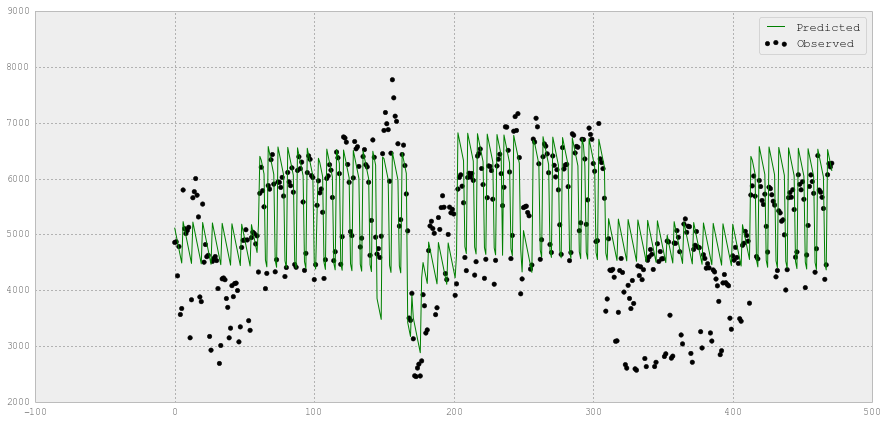

In [256]:
#Plot observed and Predicted electricity value 
fig = plt.figure(figsize=(15,7))
plt.scatter(XX_elect_test.index, YY_elect_test, label='Observed', color='k')
plt.plot(XX_elect_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

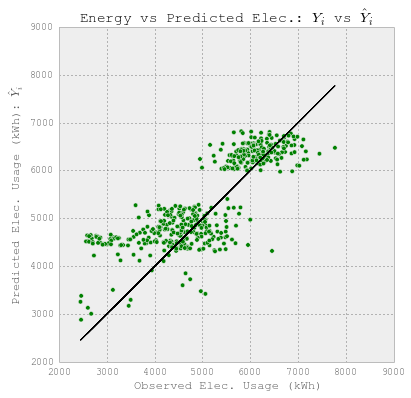

In [257]:
#Plot Observed vs. Linear Regression predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(YY_elect_test, YY_elect_test, c='k')
plt.scatter(YY_elect_test, y_lr, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")

### Daily Chilled Water Prediction

In [258]:
chilledw_train = pd.DataFrame(data=dailyChilledWater, index=np.arange('2012-01', '2013-07', dtype='datetime64[D]')).dropna()
chilledw_test = pd.DataFrame(data=dailyChilledWater, index=np.arange('2013-07', '2014-11', dtype='datetime64[D]')).dropna()

XX_chilledw_train = chilledw_train.drop('chilledWater-TonDays', axis = 1).reset_index().drop('index', axis = 1)
XX_chilledw_test = chilledw_test.drop('chilledWater-TonDays', axis = 1).reset_index().drop('index', axis = 1)

YY_chilledw_train = chilledw_train['chilledWater-TonDays']
YY_chilledw_test = chilledw_test['chilledWater-TonDays']

In [259]:
lr_chilledw = LinearRegression()
lr_chilledw.fit(XX_chilledw_train,YY_chilledw_train)

print "The test score R2: ", lr_chilledw.score(XX_chilledw_test, YY_chilledw_test)

print "The Linear Regression coefficients are"
pd.DataFrame(zip(XX_chilledw_train.columns, lr_chilledw.coef_), columns = ['chilledw_features', 'linearRegr_Coefficients'])

The test score R2:  0.830709188732
The Linear Regression coefficients are


chilledw_features  linearRegr_Coefficients
0                  RH-%                 0.464299
1                   T-C                 6.062113
2                Tdew-C                -2.486768
3         pressure-mbar                -0.095268
4   solarRadiation-W/m2                 0.042885
5         windDirection                -0.025036
6         windSpeed-m/s                -1.166902
7   humidityRatio-kg/kg              1673.166705
8        coolingDegrees                 2.853128
9        heatingDegrees                 4.421394
10     dehumidification              2999.125771
11            occupancy                 0.571356
12              weekday                -2.461900
13                  day                -0.010718
14                 week                 0.122757

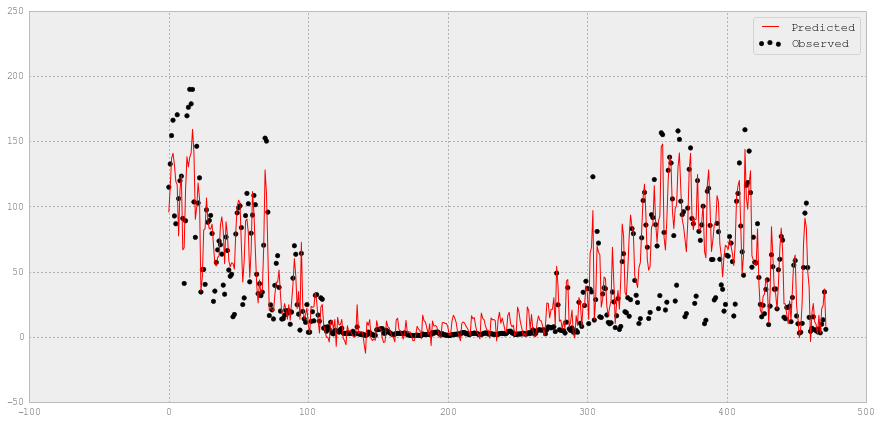

In [260]:
#Plot observed and predicted electricity value 
y_lr = lr_chilledw.predict(XX_chilledw_test)
fig = plt.figure(figsize=(15,7))
plt.scatter(XX_chilledw_test.index, YY_chilledw_test, label='Observed', color='k')
plt.plot(XX_chilledw_test.index, y_lr, label='Predicted', color='r')
plt.legend(loc='upper right')

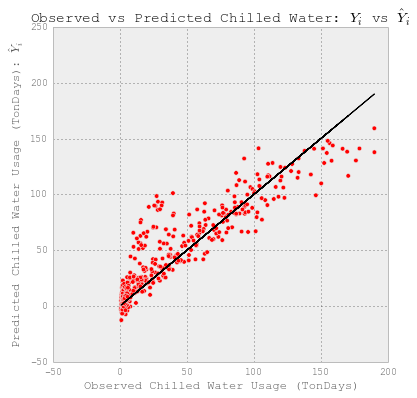

In [261]:
#Plot observed vs. Predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(YY_chilledw_test, YY_chilledw_test, c='k')
plt.scatter(YY_chilledw_test, y_lr, c='r')
plt.xlabel('Observed Chilled Water Usage (TonDays)')
plt.ylabel("Predicted Chilled Water Usage (TonDays): $\hat{Y}_i$")
plt.title("Observed vs Predicted Chilled Water: $Y_i$ vs $\hat{Y}_i$")

### Daily Steam Prediction

In [262]:
steam_train = pd.DataFrame(data=dailySteam, index=np.arange('2012-01', '2013-07', dtype='datetime64[D]')).dropna()
steam_test = pd.DataFrame(data=dailySteam, index=np.arange('2013-07', '2014-11', dtype='datetime64[D]')).dropna()

XX_steam_train = steam_train.drop('steam-LBS', axis = 1).reset_index().drop('index', axis = 1)
XX_steam_test = steam_test.drop('steam-LBS', axis = 1).reset_index().drop('index', axis = 1)

YY_steam_train = steam_train['steam-LBS']
YY_steam_test = steam_test['steam-LBS']

In [263]:
lr_steam = LinearRegression()
lr_steam.fit(XX_steam_train,YY_steam_train)

print "The test score R2: ", lr_steam.score(XX_steam_test, YY_steam_test)

print "The Linear Regression coefficients are"
pd.DataFrame(zip(XX_steam_train.columns, lr_steam.coef_), columns = ['steam_features', 'linearRegr_Coefficients'])

The test score R2:  0.942276415896
The Linear Regression coefficients are


steam_features  linearRegr_Coefficients
0                  RH-%                66.535470
1                   T-C               458.096751
2                Tdew-C              -951.521615
3         pressure-mbar               -30.891470
4   solarRadiation-W/m2               -18.446292
5         windDirection                -7.828922
6         windSpeed-m/s               251.824413
7   humidityRatio-kg/kg            857001.445663
8        coolingDegrees               -99.989152
9        heatingDegrees              1794.351286
10     dehumidification           -482120.622688
11            occupancy              3150.501909
12              weekday              -531.583401
13                  day                -1.499061
14                 week               -43.000664

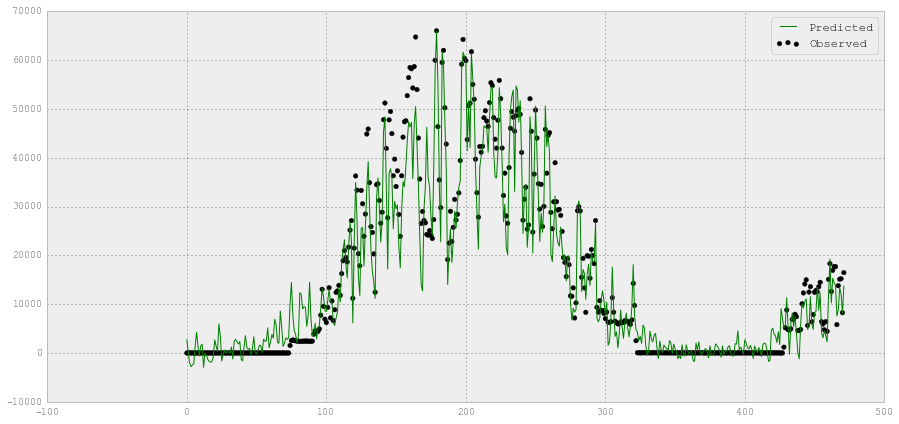

In [264]:
#Plot observed and predicted electricity value 
y_lr = lr_steam.predict(XX_steam_test)
fig = plt.figure(figsize=(15,7))
plt.scatter(XX_steam_test.index, YY_steam_test, label='Observed', color='k')
plt.plot(XX_steam_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

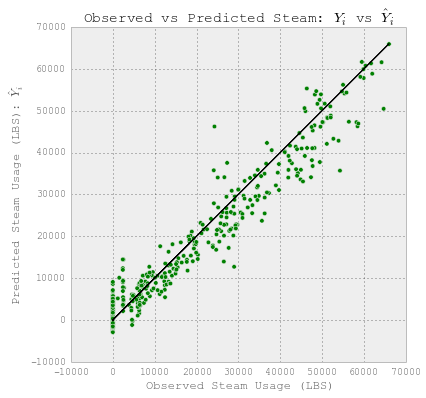

In [265]:
#Plot actual vs. Predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(YY_steam_test, YY_steam_test, c='k')
plt.scatter(YY_steam_test, y_lr, c='g')
plt.xlabel('Observed Steam Usage (LBS)')
plt.ylabel("Predicted Steam Usage (LBS): $\hat{Y}_i$")
plt.title("Observed vs Predicted Steam: $Y_i$ vs $\hat{Y}_i$")

## Hourly Prediction

Adding new features to the dataframe: hour, weekday, day of the year and week of the year.

In [266]:
def addHourlyTimeFeatures(df):
    df['hour'] = df.index.hour
    df['weekday'] = df.index.weekday
    df['day'] = df.index.dayofyear
    df['week'] = df.index.weekofyear    
    return df

hourlyElectricity = addHourlyTimeFeatures(hourlyElectricity)

### Hourly Electricity Prediction

In [280]:
df_hourlyelect = hourlyElectricity[['hour', 'weekday', 'day', 'week', 'cosHour', 
                                                      'occupancy', 'electricity-kWh']]

hourlyelect_train = pd.DataFrame(data=df_hourlyelect, index=np.arange('2014-01-01 00:00:00', '2014-10-01 00:00:00', dtype='datetime64[h]')).dropna()
hourlyelect_test = pd.DataFrame(data=df_hourlyelect, index=np.arange('2014-10-01 00:00:00', '2014-11-01 00:00:00', dtype='datetime64[h]')).dropna()

XX_hourlyelect_train = hourlyelect_train.drop('electricity-kWh', axis = 1).reset_index().drop('index', axis = 1)
XX_hourlyelect_test = hourlyelect_test.drop('electricity-kWh', axis = 1).reset_index().drop('index', axis = 1)

YY_hourlyelect_train = hourlyelect_train['electricity-kWh']
YY_hourlyelect_test = hourlyelect_test['electricity-kWh']

In [281]:
lr_hourlyelect = LinearRegression()
lr_hourlyelect.fit(XX_hourlyelect_train,YY_hourlyelect_train)

y_hourlyelect_lr = lr_hourlyelect.predict(XX_hourlyelect_test)

print "The test score R2: ", lr_hourlyelect.score(XX_hourlyelect_test, YY_hourlyelect_test)

print "The Linear Regression coefficients are"
pd.DataFrame(zip(XX_hourlyelect_train.columns, lr_hourlyelect.coef_), columns = ['hourlyelect_features', 'linearRegr_Coefficients'])

The test score R2:  0.714713369958
The Linear Regression coefficients are


hourlyelect_features  linearRegr_Coefficients
0                 hour                -0.287362
1              weekday                -6.995868
2                  day                -0.309981
3                 week                 0.955127
4              cosHour               -81.049080
5            occupancy               114.803110

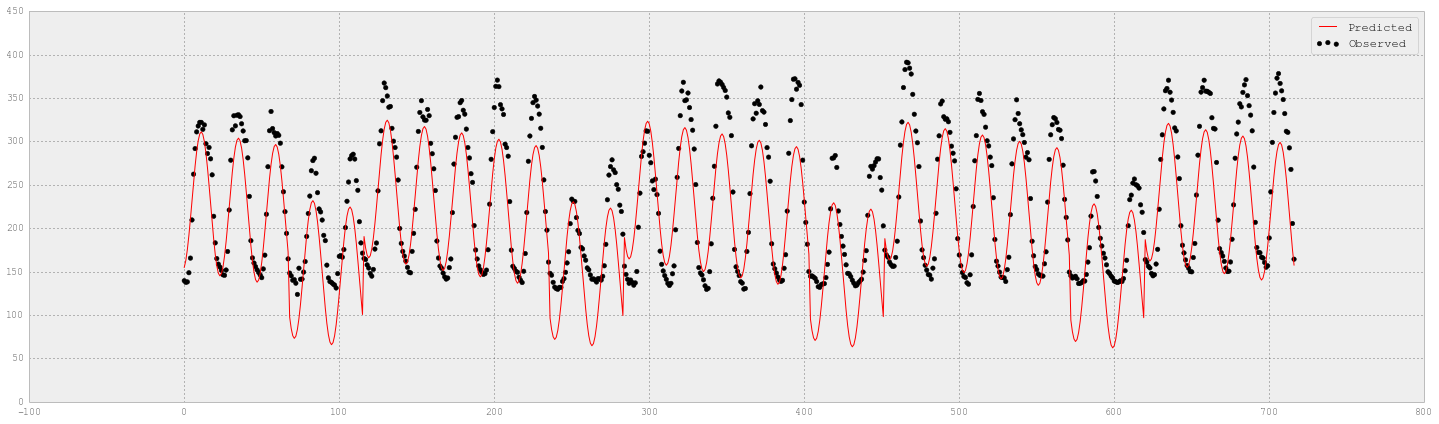

In [282]:
#Plot observed and Predicted electricity value 
fig = plt.figure(figsize=(25,7))
plt.scatter(XX_hourlyelect_test.index, YY_hourlyelect_test, label='Observed', color='k')
plt.plot(XX_hourlyelect_test.index, y_hourlyelect_lr, label='Predicted', color='r')
plt.legend(loc='upper right')

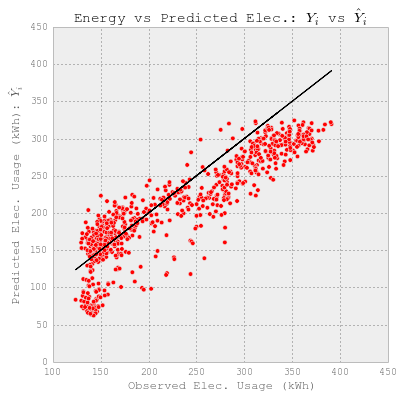

In [283]:
#Plot Observed vs. Predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(YY_hourlyelect_test, YY_hourlyelect_test, c='k')
plt.scatter(YY_hourlyelect_test, y_hourlyelect_lr, c='r')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")

### Hourly Chilled Water Prediction

In [297]:
hourlychilledw_train = pd.DataFrame(data=hourlyChilledWater, index=np.arange('2014-01-01 00:00:00', '2014-09-01 00:00:00', dtype='datetime64[h]')).dropna()
hourlychilledw_test = pd.DataFrame(data=hourlyChilledWater, index=np.arange('2014-09-01 00:00:00', '2014-11-01 00:00:00', dtype='datetime64[h]')).dropna()

XX_hourlychilledw_train = hourlychilledw_train.drop('chilledWater-TonDays', axis = 1).reset_index().drop('index', axis = 1)
XX_hourlychilledw_test = hourlychilledw_test.drop('chilledWater-TonDays', axis = 1).reset_index().drop('index', axis = 1)

YY_hourlychilledw_train = hourlychilledw_train['chilledWater-TonDays']
YY_hourlychilledw_test = hourlychilledw_test['chilledWater-TonDays']

In [298]:
lr_hourlychilledw = LinearRegression()
lr_hourlychilledw.fit(XX_hourlychilledw_train,YY_hourlychilledw_train)

y_hourlychilledw_lr = lr_hourlychilledw.predict(XX_hourlychilledw_test)

print "The test score R2: ", lr_hourlychilledw.score(XX_hourlychilledw_test, YY_hourlychilledw_test)

print "The Linear Regression coefficients are"
pd.DataFrame(zip(XX_hourlychilledw_train.columns, lr_hourlychilledw.coef_), columns = ['hourlychilledw_features', 'linearRegr_Coefficients'])

The test score R2:  0.709930521875
The Linear Regression coefficients are


hourlychilledw_features  linearRegr_Coefficients
0                     RH-%                -0.028198
1                      T-C                 0.459533
2                   Tdew-C                 0.166999
3            pressure-mbar                -0.007099
4      solarRadiation-W/m2                 0.001003
5            windDirection                -0.000382
6            windSpeed-m/s                 0.004837
7      humidityRatio-kg/kg               -91.425425
8           coolingDegrees                -0.172407
9           heatingDegrees                 0.603195
10        dehumidification               226.397306
11               occupancy                 0.483000
12                 cosHour                -0.562715

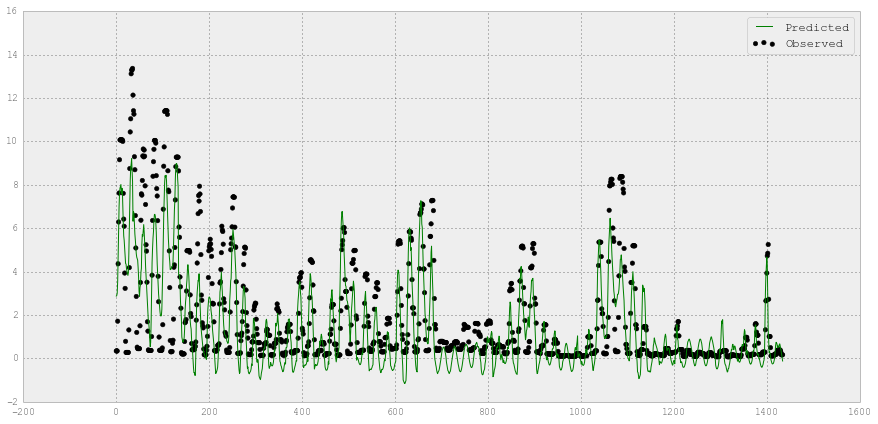

In [299]:
#Plot Observed and Predicted electricity value 
fig = plt.figure(figsize=(15,7))
plt.scatter(XX_hourlychilledw_test.index, YY_hourlychilledw_test, label='Observed', color='k')
plt.plot(XX_hourlychilledw_test.index, y_hourlychilledw_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

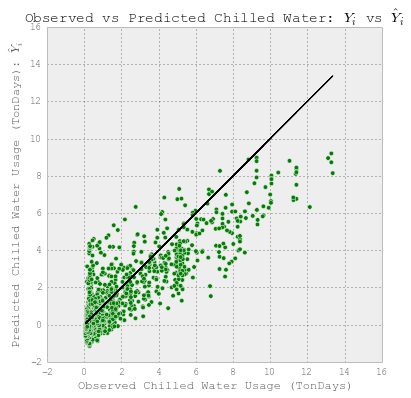

In [300]:
#Plot Observed vs. Predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(YY_hourlychilledw_test, YY_hourlychilledw_test, c='k')
plt.scatter(YY_hourlychilledw_test, y_hourlychilledw_lr, c='g')
plt.xlabel('Observed Chilled Water Usage (TonDays)')
plt.ylabel("Predicted Chilled Water Usage (TonDays): $\hat{Y}_i$")
plt.title("Observed vs Predicted Chilled Water: $Y_i$ vs $\hat{Y}_i$")

### Hourly Steam Prediction

In [343]:
hourlysteam_train = pd.DataFrame(data=hourlySteam, index=np.arange('2012-01-01 00:00:00', '2014-02-01 00:00:00', dtype='datetime64[h]')).dropna()
hourlysteam_test = pd.DataFrame(data=hourlySteam, index=np.arange('2014-02-01 00:00:00', '2014-11-01 00:00:00', dtype='datetime64[h]')).dropna()

XX_hourlysteam_train = hourlysteam_train.drop('steam-LBS', axis = 1).reset_index().drop('index', axis = 1)
XX_hourlysteam_test = hourlysteam_test.drop('steam-LBS', axis = 1).reset_index().drop('index', axis = 1)

YY_hourlysteam_train = hourlysteam_train['steam-LBS']
YY_hourlysteam_test = hourlysteam_test['steam-LBS']

In [344]:
lr_hourlysteam = LinearRegression()
lr_hourlysteam.fit(XX_hourlysteam_train,YY_hourlysteam_train)

y_hourlysteam_lr = lr_hourlysteam.predict(XX_hourlysteam_test)

print "The test score R2: ", lr_hourlysteam.score(XX_hourlysteam_test, YY_hourlysteam_test)

print "The coefficients Linear Regression are"
pd.DataFrame(zip(XX_hourlysteam_train.columns, lr_hourlysteam.coef_), columns = ['hourlysteam_features', 'linearRegr_Coefficients'])

The test score R2:  0.764295430491
The coefficients Linear Regression are


hourlysteam_features  linearRegr_Coefficients
0                  RH-%                 5.367666
1                   T-C                 8.577206
2                Tdew-C               -54.743326
3         pressure-mbar                -0.279591
4   solarRadiation-W/m2                 0.138138
5         windDirection                 0.041451
6         windSpeed-m/s                13.943372
7   humidityRatio-kg/kg             75847.104324
8        coolingDegrees               -31.597421
9        heatingDegrees                57.903822
10     dehumidification             -8088.312347
11            occupancy               131.534596
12              cosHour              -343.896782

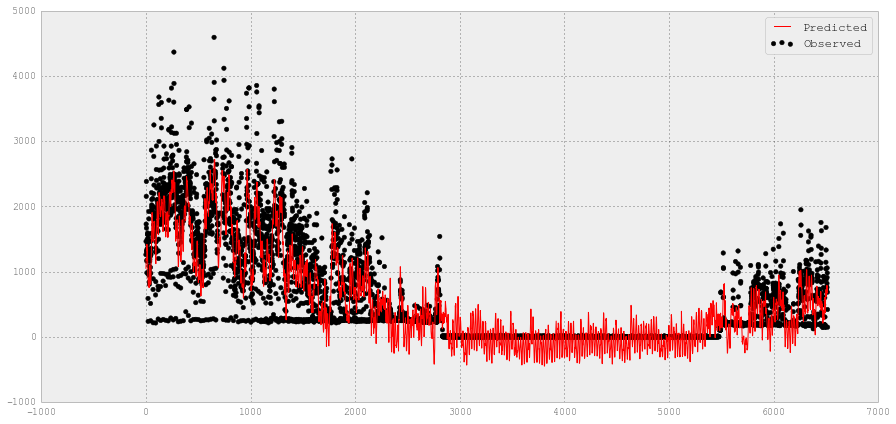

In [345]:
#Plot Observed and Predicted value 
fig = plt.figure(figsize=(15,7))
plt.scatter(XX_hourlysteam_test.index, YY_hourlysteam_test, label='Observed', color='k')
plt.plot(XX_hourlysteam_test.index, y_hourlysteam_lr, label='Predicted', color='r')
plt.legend(loc='upper right')

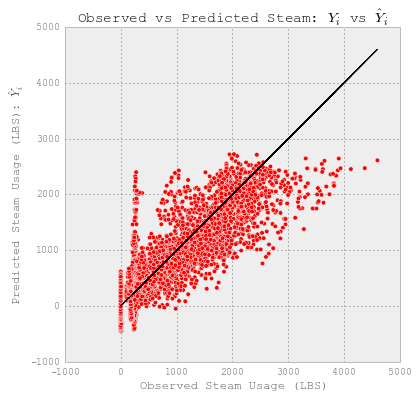

In [346]:
#Plot Observed vs. Predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(YY_hourlysteam_test, YY_hourlysteam_test, c='k')
plt.scatter(YY_hourlysteam_test, y_hourlysteam_lr, c='r')
plt.xlabel('Observed Steam Usage (LBS)')
plt.ylabel("Predicted Steam Usage (LBS): $\hat{Y}_i$")
plt.title("Observed vs Predicted Steam: $Y_i$ vs $\hat{Y}_i$")

## 2 Support Vector Regression and Cross Validation


In this notebook, we'll train a Support Vector Regression(SVR) model for predicting building energy consumption based on historical energy data, several weather variables, hour of the day, day of the week, weekends and holidays. 

To do this, we'll fit the model to daily and hourly energy and weather data from 2012-01-01 to 2014-10-31 and compute the average squared residuals from predictions.

During the design time, we've used cross-validation to fine tune the SVR parameters. And since SVR take too much time to compute, in this final notebook we'll set the parameters to their optimal value that were found with cross validation. We'll still show the range of parameters that was provided as input to cross validation.


In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn import grid_search

pd.options.display.mpl_style = 'default'

In [2]:
dailyElectricity = pd.read_excel('Data/dailyElectricityWithFeatures.xlsx')
dailyElectricity = dailyElectricity.drop('startDay', 1).drop('endDay', 1)

dailyChilledWater = pd.read_excel('Data/dailyChilledWaterWithFeatures.xlsx')
dailyChilledWater = dailyChilledWater.drop('startDay', 1).drop('endDay', 1)

dailySteam = pd.read_excel('Data/dailySteamWithFeatures.xlsx')
dailySteam = dailySteam.drop('startDay', 1).drop('endDay', 1)

hourlyElectricity = pd.read_excel('Data/hourlyElectricityWithFeatures.xlsx')
hourlyElectricity = hourlyElectricity.drop('startTime', 1).drop('endTime', 1)

hourlyChilledWater = pd.read_excel('Data/hourlyChilledWaterWithFeatures.xlsx')
hourlyChilledWater = hourlyChilledWater.drop('startTime', 1).drop('endTime', 1)

hourlySteam = pd.read_excel('Data/hourlySteamWithFeatures.xlsx')
hourlySteam = hourlySteam.drop('startTime', 1).drop('endTime', 1)

#display one dataframe
dailyElectricity.head()

electricity-kWh       RH-%       T-C     Tdew-C  pressure-mbar  \
2012-01-01      2800.244977  76.652174  7.173913   3.073913    1004.956522   
2012-01-02      3168.974047  55.958333  5.833333  -2.937500     994.625000   
2012-01-03      5194.533376  42.500000 -3.208333 -12.975000    1002.125000   
2012-01-04      5354.861935  41.541667 -7.083333 -16.958333    1008.250000   
2012-01-05      5496.223993  46.916667 -0.583333  -9.866667    1002.041667   

            solarRadiation-W/m2  windDirection  windSpeed-m/s  \
2012-01-01            95.260870     236.086957       4.118361   
2012-01-02            87.333333     253.750000       5.914357   
2012-01-03            95.708333     302.916667       6.250005   
2012-01-04            98.750000     286.666667       5.127319   
2012-01-05            90.750000     258.333333       5.162041   

            humidityRatio-kg/kg  coolingDegrees  heatingDegrees  \
2012-01-01             0.004796        0.086957        7.826087   
2012-01-02             0.003415        0.000000        9.166667   
2012-01-03             0.001327        0.000000       18.208333   
2012-01-04             0.000890        0.000000       22.083333   
2012-01-05             0.001746        0.000000       15.583333   

            dehumidification  occupancy  
2012-01-01                 0        0.0  
2012-01-02                 0        0.3  
2012-01-03                 0        0.3  
2012-01-04                 0        0.3  
2012-01-05                 0        0.3

## Daily Prediction

Adding new features to the dataframe: weekday, day of the year and week of the year.

In [37]:
def addDailyTimeFeatures(df):
    df['weekday'] = df.index.weekday
    df['day'] = df.index.dayofyear
    df['week'] = df.index.weekofyear
    return df
    
dailyElectricity = addDailyTimeFeatures(dailyElectricity)
dailyChilledWater = addDailyTimeFeatures(dailyChilledWater)
dailySteam = addDailyTimeFeatures(dailySteam)

### Daily Electricity Prediction

In [38]:
df_elect = dailyElectricity[['weekday', 'day', 'week', 'occupancy', 'electricity-kWh']]

elect_train = pd.DataFrame(data=df_elect, index=np.arange('2012-01', '2013-07', dtype='datetime64[D]')).dropna()
elect_test = pd.DataFrame(data=df_elect, index=np.arange('2013-07', '2014-11', dtype='datetime64[D]')).dropna()

XX_elect_train = elect_train.drop('electricity-kWh', axis = 1).reset_index().drop('index', axis = 1)
XX_elect_test = elect_test.drop('electricity-kWh', axis = 1).reset_index().drop('index', axis = 1)

YY_elect_train = elect_train['electricity-kWh']
YY_elect_test = elect_test['electricity-kWh']


In [45]:
# Input parameters ranges to cross validation 
gamma_range = [0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 2)]
C_range = range(1, 2500, 500)

# To speed up, we first find the optimal paratemers for C and gamma and then set them directly in the method call
tuned_parameters = [{
    'kernel': ['rbf', 'linear'],
#    'C': C_range,
#    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_elect = GridSearchCV(SVR(C=2000, gamma=0.01), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_elect = svr_elect.fit(XX_elect_train, YY_elect_train).predict(XX_elect_test)

print 'Optimum parameters C=2000 and gamma=0.01 for SVR'
print 'Optimum parameters epsilon and kernel for SVR: ', svr_elect.best_params_

print "The test score R2 for SVR: ", svr_elect.score(XX_elect_test, YY_elect_test)

print("SVR mean squared error: %.2f"
      % np.mean((YY_elect_test - svr_elect.predict(XX_elect_test)) ** 2))

Optimum parameters C=2000 and gamma=0.01 for SVR
Optimum parameters epsilon and kernel for SVR:  {'epsilon': 0.1, 'kernel': 'rbf'}
The test score R2 for RBF:  0.691753544427
RBF mean squared error: 391582.21


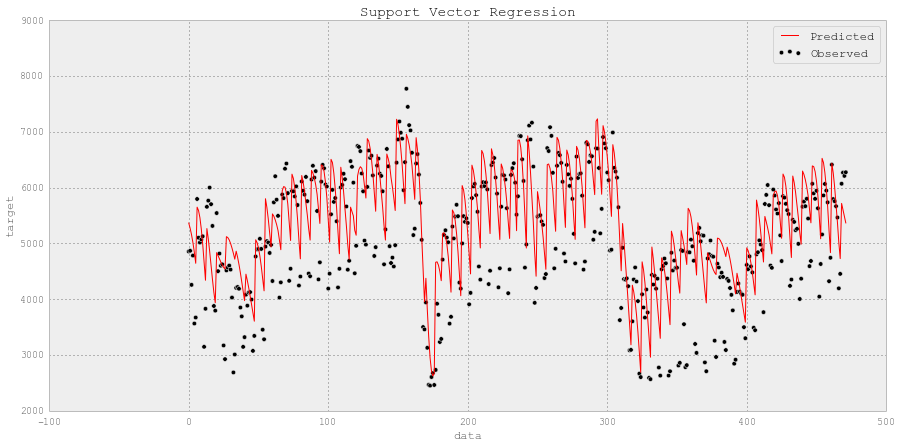

In [46]:
#Plot time series of observed and predicted electricity demand over the testing period.
fig = plt.figure(figsize=(15,7))
plt.scatter(XX_elect_test.index, YY_elect_test, c='k', label='Observed')
plt.plot(XX_elect_test.index, y_elect, c='r', label='Predicted')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

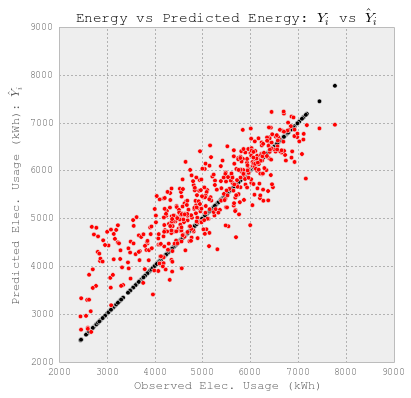

In [47]:
#Plot Observed vs. predicted usage.
fig = plt.figure(figsize=(6,6))
plt.scatter(YY_elect_test, YY_elect_test, c='k')
plt.scatter(YY_elect_test, y_elect, c='r')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Energy: $Y_i$ vs $\hat{Y}_i$")

### Daily Chilled Water Prediction

In [48]:

chilledw_train = pd.DataFrame(data=dailyChilledWater, index=np.arange('2012-01', '2013-07', dtype='datetime64[D]')).dropna()
chilledw_test = pd.DataFrame(data=dailyChilledWater, index=np.arange('2013-07', '2014-11', dtype='datetime64[D]')).dropna()

XX_chilledw_train = chilledw_train.drop('chilledWater-TonDays', axis = 1).reset_index().drop('index', axis = 1)
XX_chilledw_test = chilledw_test.drop('chilledWater-TonDays', axis = 1).reset_index().drop('index', axis = 1)

YY_chilledw_train = chilledw_train['chilledWater-TonDays']
YY_chilledw_test = chilledw_test['chilledWater-TonDays']

In [49]:
# Optimal parameters for the SVR regressor
gamma_range = [0.1, 0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 3)]
C_range = range(1, 5, 2)

# To speed up, we first find the optimal paratemers for C and gamma and then set them directly in the method call
tuned_parameters = [{
    'kernel': ['rbf', 'linear'],
#    'C': C_range,
#    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_chilledw = GridSearchCV(SVR(C=3, gamma=0.0001), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_chilledw = svr_chilledw.fit(XX_chilledw_train, YY_chilledw_train).predict(XX_chilledw_test)

print 'Optimum parameters C=3 and gamma=0.1 for SVR'
print 'Optimum epsilon and kernel: ', svr_chilledw.best_params_

print "The test score R2 for SVR: ", svr_chilledw.score(XX_chilledw_test, YY_chilledw_test)

print("SVR mean squared error: %.2f"
      % np.mean((YY_chilledw_test - svr_chilledw.predict(XX_chilledw_test)) ** 2))

Optimum parameters C=3 and gamma=0.1 for SVR
Optimum epsilon and kernel:  {'epsilon': 0.1, 'kernel': 'linear'}
The test score R2 for SVR:  0.764904375769
SVR mean squared error: 443.92


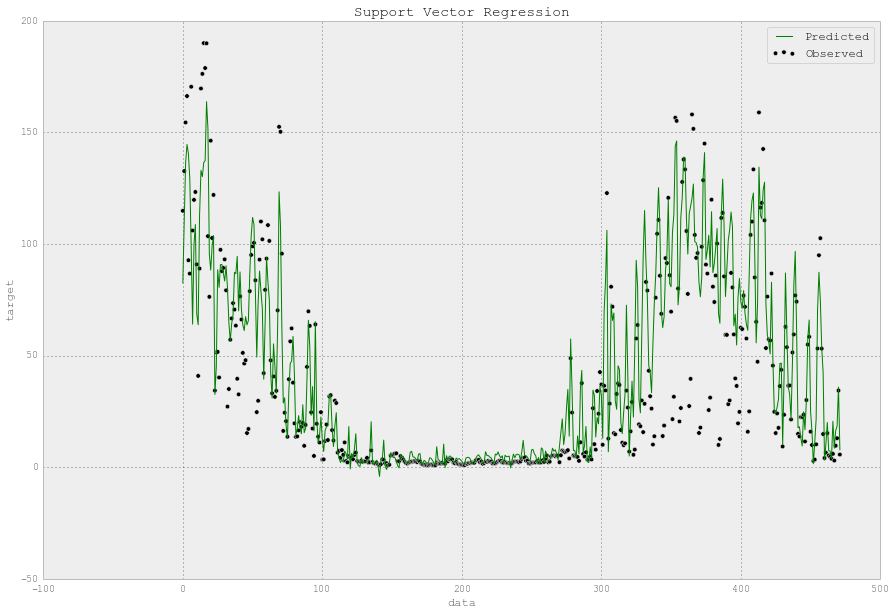

In [50]:
#Plot observed and predicted Chilled Water values with SVR
fig = plt.figure(figsize=(15,10))
plt.scatter(XX_chilledw_test.index, YY_chilledw_test, c='k', label='Observed')
plt.plot(XX_chilledw_test.index, y_chilledw, c='g', label='Predicted')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

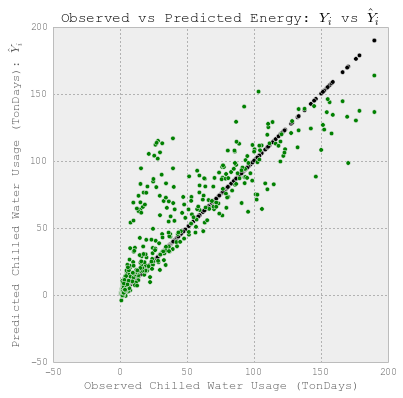

In [51]:
#Plot observed vs predicted energy usage
fig = plt.figure(figsize=(6,6))
plt.scatter(YY_chilledw_test, YY_chilledw_test, c='k')
plt.scatter(YY_chilledw_test, y_chilledw, c='g')
plt.xlabel('Observed Chilled Water Usage (TonDays)')
plt.ylabel("Predicted Chilled Water Usage (TonDays): $\hat{Y}_i$")
plt.title("Observed vs Predicted Energy: $Y_i$ vs $\hat{Y}_i$")

### Daily Steam Prediction

In [52]:
steam_train = pd.DataFrame(data=dailySteam, index=np.arange('2012-01', '2013-07', dtype='datetime64[D]')).dropna()
steam_test = pd.DataFrame(data=dailySteam, index=np.arange('2013-07', '2014-11', dtype='datetime64[D]')).dropna()

XX_steam_train = steam_train.drop('steam-LBS', axis = 1).reset_index().drop('index', axis = 1)
XX_steam_test = steam_test.drop('steam-LBS', axis = 1).reset_index().drop('index', axis = 1)

YY_steam_train = steam_train['steam-LBS']
YY_steam_test = steam_test['steam-LBS']

In [59]:
# Optimal parameters for the SVR regressor
gamma_range = [0.1, 0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 3)]
C_range = range(1, 500, 50)

tuned_parameters = [{
    'kernel': ['rbf', 'linear'],
#    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_steam = GridSearchCV(SVR(C=50), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_steam = svr_steam.fit(XX_steam_train, YY_steam_train).predict(XX_steam_test)

print 'Optimum parameters C=50 for SVR'
print 'Optimum epsilon, gamma and kernel: ', svr_steam.best_params_

print "The test score R2 for SVR: ", svr_steam.score(XX_steam_test, YY_steam_test)

print("SVR mean squared error: %.2f"
      % np.mean((YY_steam_test - svr_steam.predict(XX_steam_test)) ** 2))

Optimum parameters C=50 for SVR
Optimum epsilon, gamma and kernel:  {'epsilon': 0.2, 'gamma': 0.1, 'kernel': 'linear'}
The test score R2 for SVR:  0.938467924325
SVR mean squared error: 20632451.77


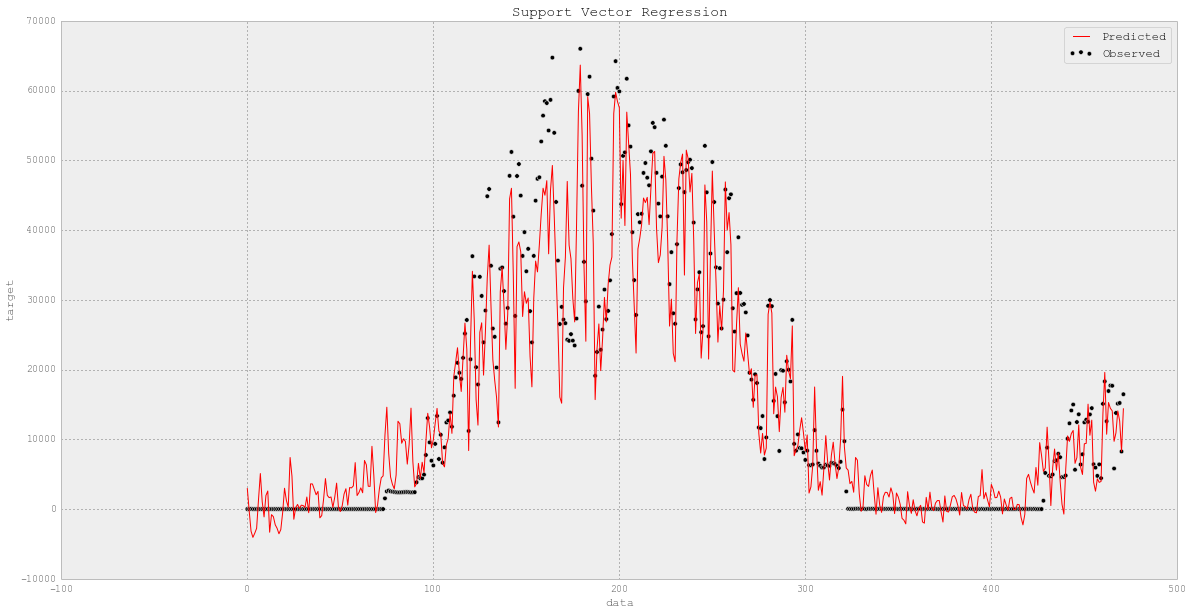

In [60]:
#Plot observed and predicted Steam values 
fig,ax = plt.subplots(1, 1,figsize=(20,10))
plt.scatter(XX_steam_test.index, YY_steam_test, c='k', label='Observed')
plt.plot(XX_steam_test.index, y_steam, c='r', label='Predicted')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

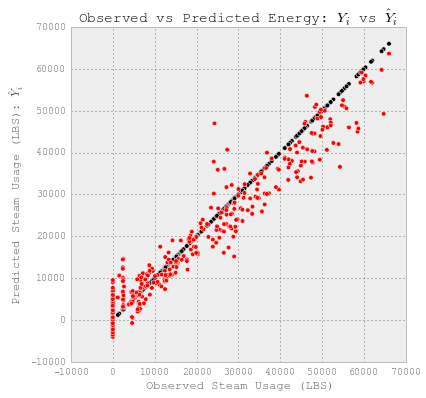

In [61]:
#Plot Observed vs Predicted 
fig = plt.figure(figsize=(6,6))
plt.scatter(YY_steam_test, YY_steam_test, c='k')
plt.scatter(YY_steam_test, y_steam, c='r')
plt.xlabel('Observed Steam Usage (LBS)')
plt.ylabel("Predicted Steam Usage (LBS): $\hat{Y}_i$")
plt.title("Observed vs Predicted Energy: $Y_i$ vs $\hat{Y}_i$")

## Hourly Prediction

### Hourly Electricity Prediction

Adding new features to the dataframe: hour, weekday, day of the year and week of the year.

In [89]:
def addHourlyTimeFeatures(df):
    df['hour'] = df.index.hour
    df['weekday'] = df.index.weekday
    df['day'] = df.index.dayofyear
    df['week'] = df.index.weekofyear    
    return df

hourlyElectricity = addHourlyTimeFeatures(hourlyElectricity)

In [96]:
df_hourlyelect = hourlyElectricity[['hour', 'weekday', 'day', 'week', 'cosHour', 
                                                      'occupancy', 'electricity-kWh']]

hourlyelect_train = pd.DataFrame(data=df_hourlyelect, index=np.arange('2014-01-01 00:00:00', '2014-10-01 00:00:00', dtype='datetime64[h]')).dropna()
hourlyelect_test = pd.DataFrame(data=df_hourlyelect, index=np.arange('2014-10-01 00:00:00', '2014-11-01 00:00:00', dtype='datetime64[h]')).dropna()

XX_hourlyelect_train = hourlyelect_train.drop('electricity-kWh', axis = 1).reset_index().drop('index', axis = 1)
XX_hourlyelect_test = hourlyelect_test.drop('electricity-kWh', axis = 1).reset_index().drop('index', axis = 1)

YY_hourlyelect_train = hourlyelect_train['electricity-kWh']
YY_hourlyelect_test = hourlyelect_test['electricity-kWh']

In [99]:
# Optimal parameters for the SVR regressor
gamma_range = [0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 2)]
C_range = range(1, 5, 1)

tuned_parameters = [{
    'kernel': ['rbf', 'linear'],
#    'C': C_range,
#    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_hourlyelect = GridSearchCV(SVR(C=1, gamma=0.01), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_hourlyelect = svr_hourlyelect.fit(XX_hourlyelect_train, YY_hourlyelect_train).predict(XX_hourlyelect_test)

print 'Optimum parameters C=1 and gamma=0.01 for SVR'
print 'Optimum epsilon and kernel for SVR: ', svr_hourlyelect.best_params_

print "The test score R2: ", svr_hourlyelect.score(XX_hourlyelect_test, YY_hourlyelect_test)

print("SVR mean squared error: %.2f"
      % np.mean((YY_hourlyelect_test - svr_hourlyelect.predict(XX_hourlyelect_test)) ** 2))

Optimum parameters C=1 and gamma=0.01 for SVR
Optimum epsilon and kernel for SVR:  {'epsilon': 0.1, 'kernel': 'linear'}
The test score R2:  0.747282383852
SVR mean squared error: 1561.24


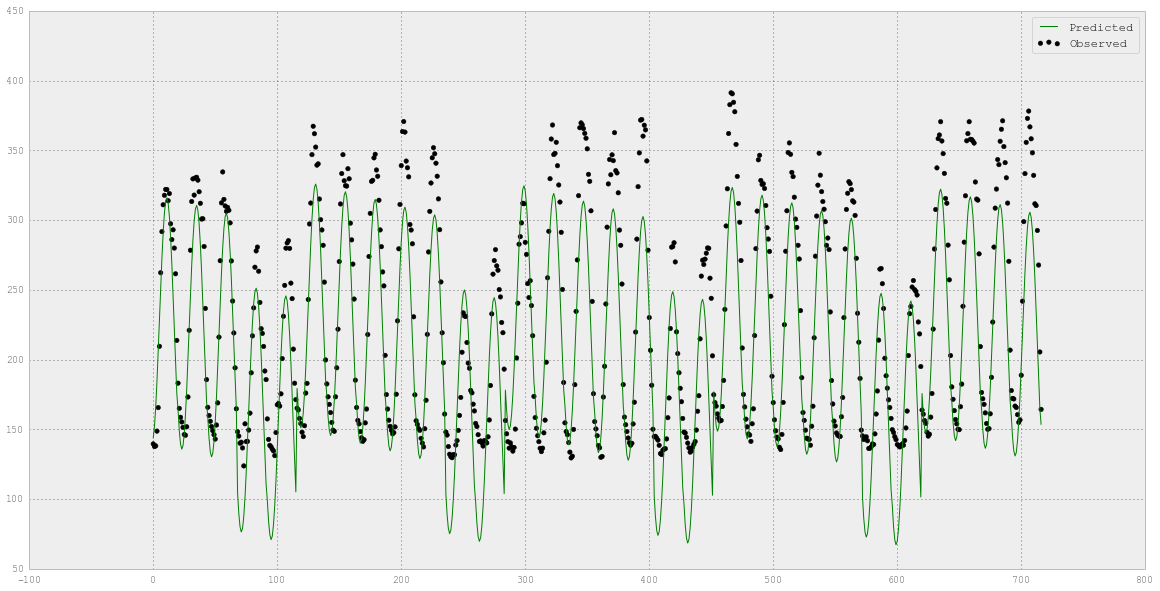

In [100]:
#Plot observed and predicted electricity value 
fig = plt.figure(figsize=(20,10))
plt.scatter(XX_hourlyelect_test.index, YY_hourlyelect_test, label='Observed', color='k')
plt.plot(XX_hourlyelect_test.index, y_hourlyelect, label='Predicted', color='g')
plt.legend(loc='upper right')

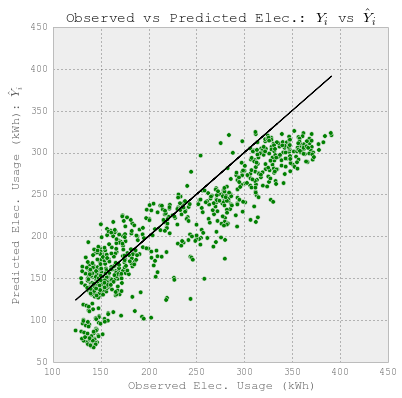

In [101]:
#Plot Observed vs. Predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(YY_hourlyelect_test, YY_hourlyelect_test, c='k')
plt.scatter(YY_hourlyelect_test, y_hourlyelect, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Observed vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")